# Task 4.9 Part 2

In [1]:
#import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Create path
path = r'C:\Users\RebekkaBrandt\Documents\Instacart Basket Analysis'

In [3]:
# Import orders_products_all
ords_prods_all = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_all.pkl'))

In [6]:
ords_prods_all.shape

(32404859, 35)

In [7]:
ords_prods_all.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_previous_order,product_id,add_to_cart_order,reordered,product_name,...,frequency_flag,first_name,last_name,gender,state,age,date_joined,number_of_dependants,family_status,income
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


## Create Sample

In [8]:
#  Creating a list with True/Fales at a 70/30 ratio
np.random.seed(4)
dev = np.random.rand(len(ords_prods_all)) <= 0.7

In [9]:
# Store 70 % under big
big = ords_prods_all[dev]

In [10]:
# Store 30% under small
small = ords_prods_all[~dev]

In [11]:
len(ords_prods_all)

32404859

In [12]:
len(big) + len (small)

32404859

In [13]:
# creating subset of data 
df_2 = small[['orders_day_of_week','prices']]

## Create Charts

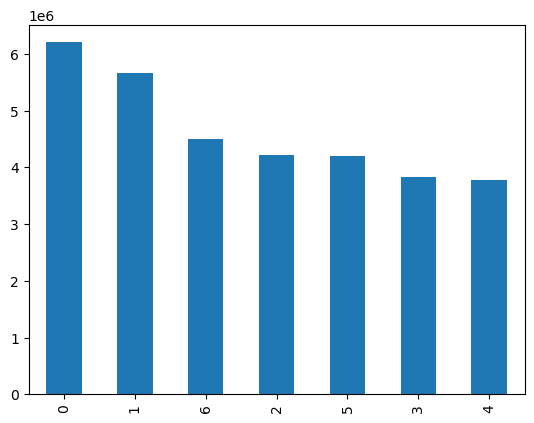

In [14]:
# Creating a Bar chart
bar = ords_prods_all['orders_day_of_week'].value_counts().plot.bar()

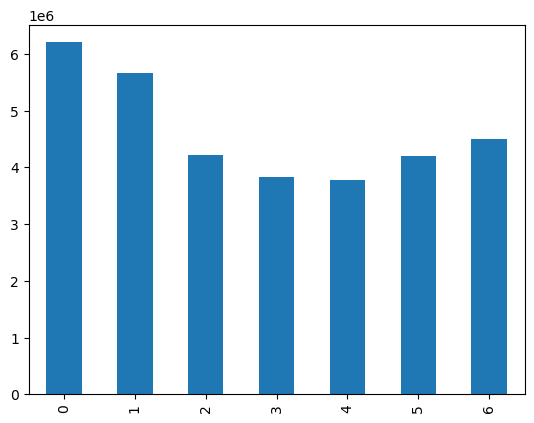

In [15]:
bar_sort = ords_prods_all['orders_day_of_week'].value_counts().sort_index().plot.bar()

<Axes: ylabel='Frequency'>

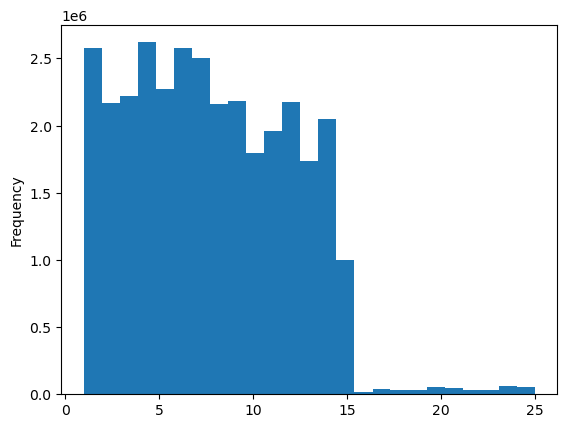

In [16]:
# create histogram
ords_prods_all['prices'].plot.hist(bins = 25)

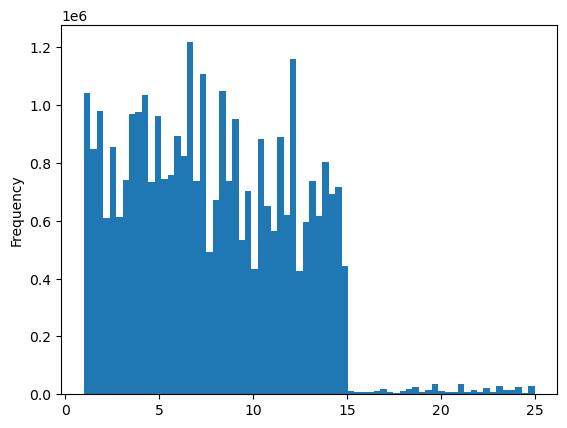

In [17]:
# create histogram with thinner coloumns
hist= ords_prods_all['prices'].plot.hist(bins = 70)

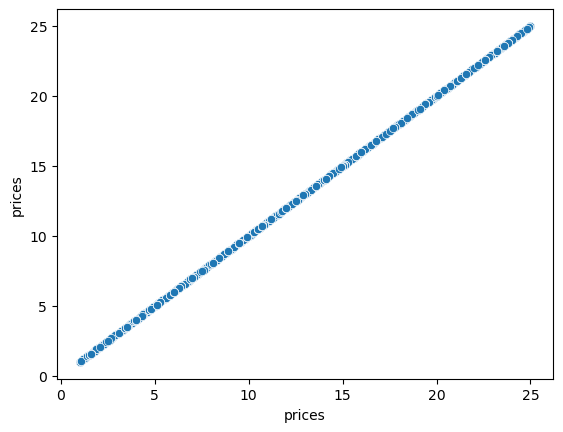

In [36]:
# create scaterplot
scatterplot_price = sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_all)

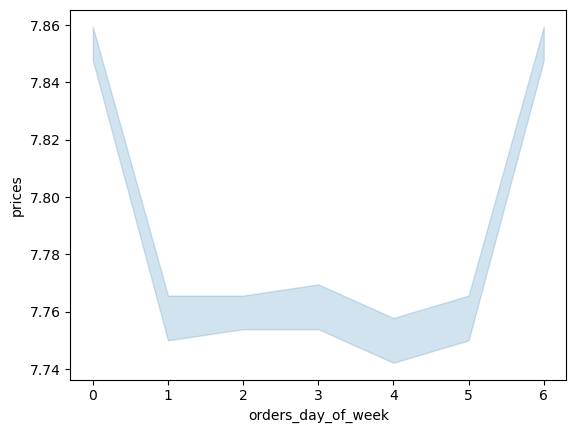

In [32]:
# create linechart with subset
line_week = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')

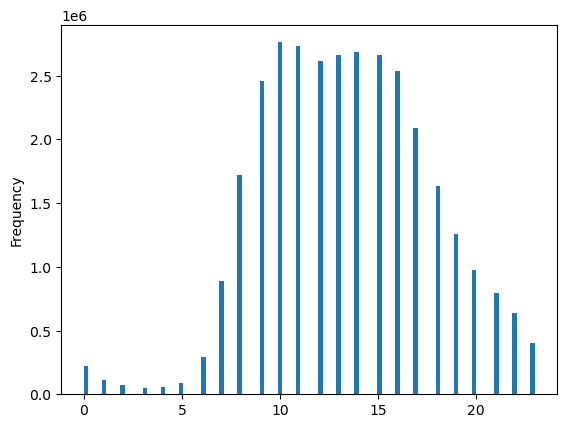

In [30]:
# create histogram for order_hour_of_day
hist_hour = ords_prods_all['order_hour_of_day'].plot.hist(bins = 100)

There are few orders between 0 and 5, when they the beginn to rise, with the most orders occuring between 10 and 16 and then start going down again

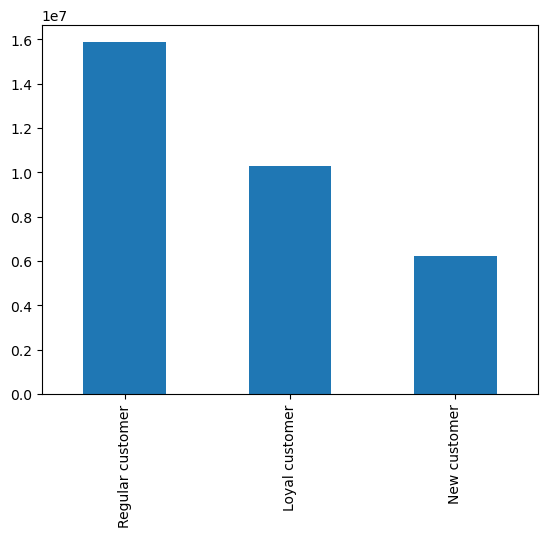

In [31]:
# bar chart for loyalty flag
bar_loyalty = ords_prods_all['loyalty_flag'].value_counts().plot.bar()


In [22]:
# creating subset of data 
df_3 = small[['order_hour_of_day','prices']]

In [23]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9721098 entries, 0 to 32404850
Data columns (total 2 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_hour_of_day  int8   
 1   prices             float16
dtypes: float16(1), int8(1)
memory usage: 102.0 MB


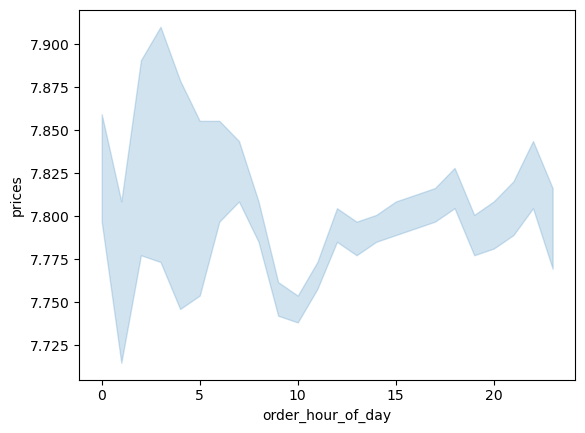

In [33]:
# creating a linechart for prices by hour of day
line_hour = sns.lineplot(data = df_3, x = 'order_hour_of_day',y = 'prices')

In [25]:
# creating subset of data 
df_fam = small[['age','number_of_dependants']]

In [26]:
df_fam.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9721098 entries, 0 to 32404850
Data columns (total 2 columns):
 #   Column                Dtype
---  ------                -----
 0   age                   int8 
 1   number_of_dependants  int8 
dtypes: int8(2)
memory usage: 92.7 MB


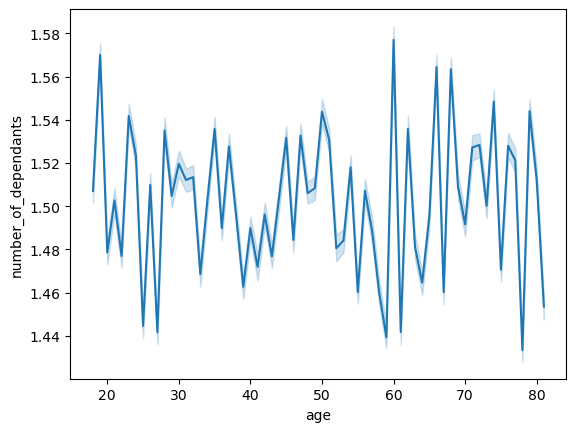

In [34]:
# creating a linechart for age and family status
line_fam = sns.lineplot(data = df_fam, x = 'age',y = 'number_of_dependants')

there does not seem to be a discernable patern, so I would say there is no correlation  between age and number of dependants that can be used for targeted marketing campaigns

In [28]:
# creating subset of data 
df_inc = small[['age','income']]

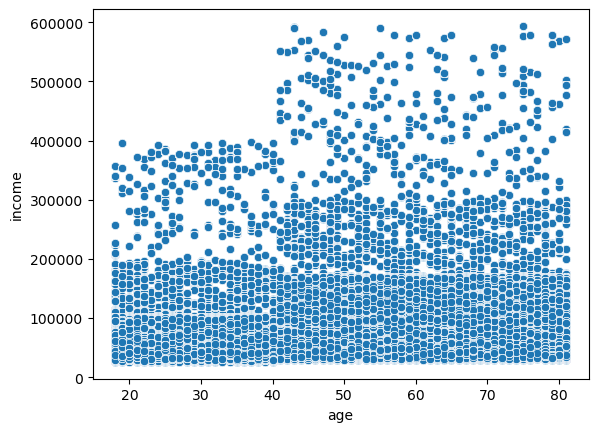

In [35]:
# create scaterplot
scatterplot_age_income = sns.scatterplot(x = 'age', y = 'income',data = df_inc)

We can see that the higher the age the higher the income is. There also seems to be a significant jump around the age of 40

## Export Charts

In [38]:
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

In [39]:
bar_sort.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow_sorted.png'))

In [40]:
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_prices.png'))

In [43]:
scatterplot_price.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatterplot_price.png'))

In [44]:
line_week.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_week_prices.png'))

In [45]:
hist_hour.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_hour.png'))

In [46]:
bar_loyalty.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty_flag.png'))

In [47]:
line_hour.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_hour_prices.png'))

In [48]:
scatterplot_age_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatterplot_age_income.png'))